# Análise de Veículos Elétricos e Híbridos em Washington, Estados Unidos – 2025

Veja o README para contexto completo e insights.

In [14]:
# Célula 1 - Importações e configuração visual

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.patches import Patch      

# Configurações usadas em todos os gráficos
def aplicar_estilo():
    plt.gcf().patch.set_facecolor('#f0f0f0')
    plt.gca().set_facecolor('#f0f0f0')
    # Bordas limpas
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_color('#999999')
    plt.gca().spines['left'].set_color('#999999')

%matplotlib inline

%matplotlib inline

print("Bibliotecas carregadas e configuração visual aplicada!")

Bibliotecas carregadas e configuração visual aplicada!


In [15]:
# Célula 2 — Leitura do dataset
csv_path = "Electric_Vehicle_Population_Data.csv"

df = pd.read_csv(csv_path)

print("Dataset carregado com sucesso!")
print(f"Total de veículos registrados: {len(df):,}")
print(f"Total de colunas: {df.shape[1]}")
df.head()

Dataset carregado com sucesso!
Total de veículos registrados: 264,628
Total de colunas: 17


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,WA1E2AFY8R,Thurston,Olympia,WA,98512.0,2024,AUDI,Q5 E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,23.0,0.0,22.0,263239938,POINT (-122.90787 46.9461),PUGET SOUND ENERGY INC,5.306701e+10
1,WAUUPBFF4J,Yakima,Wapato,WA,98951.0,2018,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16.0,0.0,15.0,318160860,POINT (-120.42083 46.44779),PACIFICORP,5.307794e+10
2,1N4AZ0CP0F,King,Seattle,WA,98125.0,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,0.0,46.0,184963586,POINT (-122.30253 47.72656),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
3,WA1VAAGE5K,King,Kent,WA,98031.0,2019,AUDI,E-TRON,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,204.0,0.0,11.0,259426821,POINT (-122.17743 47.41185),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,7SAXCAE57N,Snohomish,Bothell,WA,98021.0,2022,TESLA,MODEL X,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,1.0,208182236,POINT (-122.18384 47.8031),PUGET SOUND ENERGY INC,5.306105e+10


In [16]:
# Célula 3 — Renomear colunas para português
df.rename(columns={
    'VIN (1-10)': 'VIN_1_10',
    'County': 'Condado',
    'City': 'Cidade',
    'State': 'Estado',
    'Postal Code': 'CEP',
    'Model Year': 'Ano_Modelo',
    'Make': 'Marca',
    'Model': 'Modelo',
    'Electric Vehicle Type': 'Tipo_Veiculo',
    'Clean Alternative Fuel Vehicle (CAFV) Eligibility': 'Elegibilidade_CAFV',
    'Electric Range': 'Autonomia_milhas',
    'Base MSRP': 'Preco_Base',
    'Legislative District': 'Distrito_Legislativo',
    'DOL Vehicle ID': 'ID_Veiculo',
    'Vehicle Location': 'Localizacao_Veiculo',
    'Electric Utility': 'Concessionaria',
    '2020 Census Tract': 'Censo_2020'
}, inplace=True)

print("Colunas renomeadas com sucesso!")
print(df.columns.tolist())

Colunas renomeadas com sucesso!
['VIN_1_10', 'Condado', 'Cidade', 'Estado', 'CEP', 'Ano_Modelo', 'Marca', 'Modelo', 'Tipo_Veiculo', 'Elegibilidade_CAFV', 'Autonomia_milhas', 'Preco_Base', 'Distrito_Legislativo', 'ID_Veiculo', 'Localizacao_Veiculo', 'Concessionaria', 'Censo_2020']


In [17]:
# Célula 4 — Limpeza: Coluna Preco_Base

# Converte para string, remove tudo que não é número ou ponto
df['Preco_Base'] = df['Preco_Base'].astype(str).str.replace(r'[^0-9.]', '', regex=True)

# Converte para número (valores inválidos viram NaN)
df['Preco_Base'] = pd.to_numeric(df['Preco_Base'], errors='coerce')

# Zeros viram NaN
df.loc[df['Preco_Base'] == 0, 'Preco_Base'] = np.nan

print(f"Limpeza concluída → {df['Preco_Base'].isna().sum():,} valores ausentes em Preço Base")

Limpeza concluída → 261,480 valores ausentes em Preço Base


In [18]:
# Célula 5 — Estatísticas Descritivas — Preço Base (MSRP)

# Filtra apenas veículos com preço informado
df_price = df[df['Preco_Base'].notna()].copy()

print(f"Veículos com preço informado: {len(df_price):,} de {len(df):,}")
print("Estatísticas descritivas da coluna Preço Base (MSRP):\n")

# Calcula estatísticas
stats = df_price['Preco_Base'].describe()

# Formatação count sem $, os outros com $
def formata_preco(x):
    if isinstance(x, (int, float)):
        if stats.index[stats == x][0] == 'count':
            return f'{int(x):,}'.replace(',', '.')
        else:
            return f'$ {x:,.0f}'.replace(',', '.')
    return x

stats_formatadas = stats.apply(formata_preco)

# Exibe em tabela bonita
display(stats_formatadas.to_frame("Estatística"))

Veículos com preço informado: 3,148 de 264,628
Estatísticas descritivas da coluna Preço Base (MSRP):



,Estatística
count,3.148
mean,$ 57.069
std,$ 27.354
min,$ 31.950
25%,$ 39.221
50%,$ 55.700
75%,$ 69.900
max,$ 845.000


In [20]:
# Célula 6 - Inspeção Inicial do dataset

print("Dimensões do dataset:", df.shape)
print(f"→ {df.shape[0]:,} veículos registrados")
print(f"→ {df.shape[1]} colunas\n")

print("Colunas disponíveis:")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")
print()

print("Informações gerais (tipos + valores nulos):")
df.info()
print()

print("Primeiras 5 linhas do dataset:")
df.head()

Dimensões do dataset: (264628, 17)
→ 264,628 veículos registrados
→ 17 colunas

Colunas disponíveis:
 1. VIN_1_10
 2. Condado
 3. Cidade
 4. Estado
 5. CEP
 6. Ano_Modelo
 7. Marca
 8. Modelo
 9. Tipo_Veiculo
10. Elegibilidade_CAFV
11. Autonomia_milhas
12. Preco_Base
13. Distrito_Legislativo
14. ID_Veiculo
15. Localizacao_Veiculo
16. Concessionaria
17. Censo_2020

Informações gerais (tipos + valores nulos):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264628 entries, 0 to 264627
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   VIN_1_10              264628 non-null  object 
 1   Condado               264619 non-null  object 
 2   Cidade                264619 non-null  object 
 3   Estado                264628 non-null  object 
 4   CEP                   264619 non-null  float64
 5   Ano_Modelo            264628 non-null  int64  
 6   Marca                 264628 non-null  object 
 7   Model

,VIN_1_10,Condado,Cidade,Estado,CEP,Ano_Modelo,Marca,Modelo,Tipo_Veiculo,Elegibilidade_CAFV,Autonomia_milhas,Preco_Base,Distrito_Legislativo,ID_Veiculo,Localizacao_Veiculo,Concessionaria,Censo_2020
0,WA1E2AFY8R,Thurston,Olympia,WA,98512.0,2024,AUDI,Q5 E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,23.0,NaN,22.0,263239938,POINT (-122.90787 46.9461),PUGET SOUND ENERGY INC,5.306701e+10
1,WAUUPBFF4J,Yakima,Wapato,WA,98951.0,2018,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16.0,NaN,15.0,318160860,POINT (-120.42083 46.44779),PACIFICORP,5.307794e+10
2,1N4AZ0CP0F,King,Seattle,WA,98125.0,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,NaN,46.0,184963586,POINT (-122.30253 47.72656),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
3,WA1VAAGE5K,King,Kent,WA,98031.0,2019,AUDI,E-TRON,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,204.0,NaN,11.0,259426821,POINT (-122.17743 47.41185),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,7SAXCAE57N,Snohomish,Bothell,WA,98021.0,2022,TESLA,MODEL X,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,NaN,1.0,208182236,POINT (-122.18384 47.8031),PUGET SOUND ENERGY INC,5.306105e+10


In [21]:
# Célula 7 — Exploração Descritiva do Dataset

print("Estatísticas descritivas das colunas numéricas:\n")
stats = df.describe().round(2)
display(stats)

print("\nQuantidade de valores únicos por coluna (ordenado):\n")
unique_counts = df.nunique().sort_values(ascending=False)
display(unique_counts.to_frame("Valores Únicos"))

print("\nValores ausentes por coluna:\n")
missing_counts = df.isnull().sum()
missing_pct = (df.isnull().mean() * 100).round(2)
missing_df = pd.DataFrame({
    'Ausentes': missing_counts,
    'Percentual (%)': missing_pct.map('{:.2f}%'.format)
}).sort_values('Ausentes', ascending=False)

# Deixa só as colunas que têm pelo menos 1 valor ausente (fica mais limpo)
missing_df = missing_df[missing_df['Ausentes'] > 0]
display(missing_df)

Estatísticas descritivas das colunas numéricas:



,CEP,Ano_Modelo,Autonomia_milhas,Preco_Base,Distrito_Legislativo,ID_Veiculo,Censo_2020
count,264619.00,264628.00,264624.00,3148.00,263969.00,2.646280e+05,2.646190e+05
mean,98170.77,2021.84,41.71,57069.19,28.86,2.422540e+08,5.297109e+10
std,2637.72,3.04,80.38,27354.07,14.88,6.516028e+07,1.638317e+09
min,1469.00,1999.00,0.00,31950.00,1.00,4.385000e+03,1.001020e+09
25%,98052.00,2021.00,0.00,39221.25,17.00,2.174474e+08,5.303301e+10
50%,98133.00,2023.00,0.00,55700.00,32.00,2.603598e+08,5.303303e+10
75%,98382.00,2024.00,34.00,69900.00,42.00,2.758921e+08,5.305307e+10
max,99577.00,2026.00,337.00,845000.00,49.00,4.791150e+08,6.601095e+10



Quantidade de valores únicos por coluna (ordenado):



,Valores Únicos
ID_Veiculo,264628
VIN_1_10,15972
Censo_2020,2328
CEP,1067
Localizacao_Veiculo,1066
Cidade,858
Condado,239
Modelo,182
Autonomia_milhas,113
Concessionaria,76



Valores ausentes por coluna:



,Ausentes,Percentual (%)
Preco_Base,261480,98.81%
Distrito_Legislativo,659,0.25%
Localizacao_Veiculo,17,0.01%
Censo_2020,9,0.00%
Cidade,9,0.00%
Concessionaria,9,0.00%
CEP,9,0.00%
Condado,9,0.00%
Autonomia_milhas,4,0.00%


In [37]:
# Célula 8 — Frequência de marcas, modelos e tipos de veículos

print("Top 10 marcas mais registradas:\n")
top_marcas = df['Marca'].value_counts().head(10)
display(top_marcas.to_frame("Quantidade"))


print("\nTop 10 modelos mais comuns:\n")
top_modelos = df['Modelo'].value_counts().head(10)
display(top_modelos.to_frame("Quantidade"))

print("\nDistribuição por tipo de veículo:\n")
tipo_counts = df['Tipo_Veiculo'].value_counts()
tipo_pct = (df['Tipo_Veiculo'].value_counts(normalize=True) * 100).round(2)

tipo_final = pd.concat([tipo_counts, tipo_pct], axis=1)
tipo_final.columns = ['Quantidade', 'Percentual (%)']
tipo_final['Percentual (%)'] = tipo_final['Percentual (%)'].astype(str) + '%'

display(tipo_final)

Top 10 marcas mais registradas:



,Quantidade
Marca,
TESLA,108633
CHEVROLET,19051
NISSAN,16177
FORD,14347
KIA,13183
TOYOTA,11022
BMW,10882
HYUNDAI,9278
RIVIAN,8118



Top 10 modelos mais comuns:



,Quantidade
Modelo,
MODEL Y,55187
MODEL 3,37340
LEAF,13768
BOLT EV,7845
MODEL S,7813
MODEL X,6684
MUSTANG MACH-E,5893
ID.4,5731
IONIQ 5,5267



Distribuição por tipo de veículo:



,Quantidade,Percentual (%)
Tipo_Veiculo,,
Battery Electric Vehicle (BEV),210575,79.57%
Plug-in Hybrid Electric Vehicle (PHEV),54053,20.43%


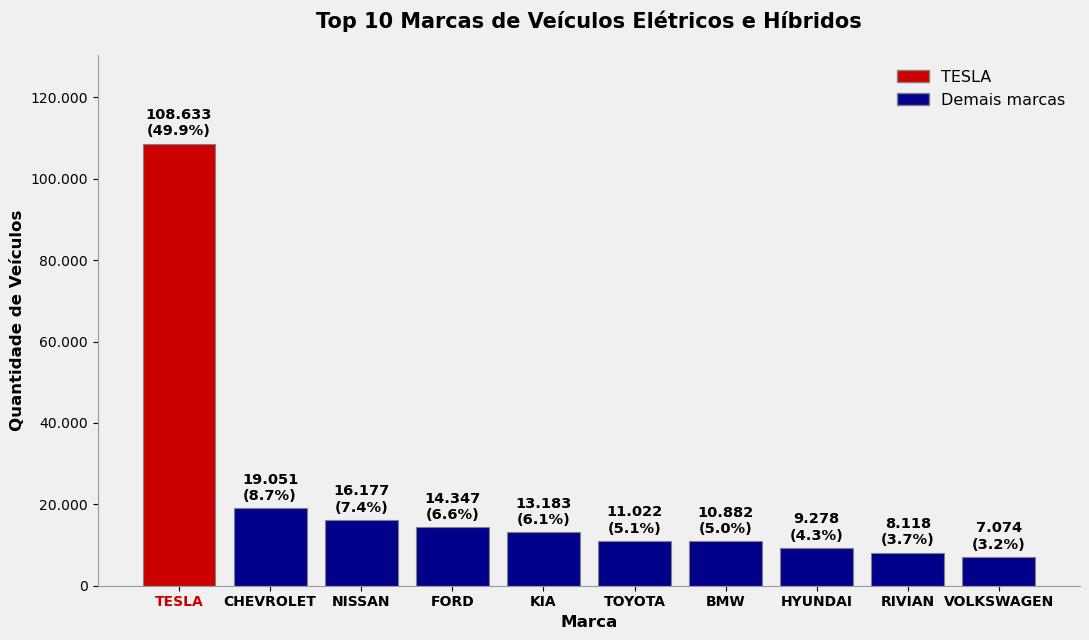

In [9]:
# Célula 9
# Gráfico 1 - Top 10 Marcas de Veículos Elétricos e Híbridos

import matplotlib.pyplot as plt
from matplotlib.patches import Patch

top_makes = df['Marca'].value_counts().head(10)
total_top10 = top_makes.sum()
percentages = (top_makes / total_top10 * 100).round(1)

cores = ['#cc0000' if marca == 'TESLA' else 'darkblue' for marca in top_makes.index]

plt.figure(figsize=(11, 6.5))
aplicar_estilo()  # fundo + bordas

bars = plt.bar(top_makes.index, top_makes.values, color=cores, edgecolor='grey', linewidth=0.8)

# Valores
for bar, valor, pct in zip(bars, top_makes.values, percentages):
    plt.text(bar.get_x() + bar.get_width()/2,
             bar.get_height() + top_makes.max()*0.012,
             f'{valor:,.0f}'.replace(',', '.') + f'\n({pct}%)',
             ha='center', va='bottom', fontsize=10.5, fontweight='bold')

# Título e rótulos
plt.title('Top 10 Marcas de Veículos Elétricos e Híbridos',
          fontsize=15, fontweight='bold', pad=20)
plt.xlabel('Marca', fontsize=12, fontweight='bold')
plt.ylabel('Quantidade de Veículos', fontsize=12, fontweight='bold')

# Eixo Y
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:,.0f}'.replace(',', '.')))

# Eixo X
for label in plt.gca().get_xticklabels():
    if label.get_text() == 'TESLA':
        label.set_color('#cc0000')
    label.set_fontweight('bold')   # <— FORÇA O BOLD NOS TICKS

# Legendas
legend_elements = [
    Patch(facecolor='#cc0000', edgecolor='grey', label='TESLA'),
    Patch(facecolor='darkblue', edgecolor='grey', label='Demais marcas')
]
plt.legend(handles=legend_elements, loc='upper right', frameon=False, fontsize=11.5)

plt.xticks(rotation=0)
plt.ylim(0, top_makes.max() * 1.20)
plt.tight_layout()
plt.show()

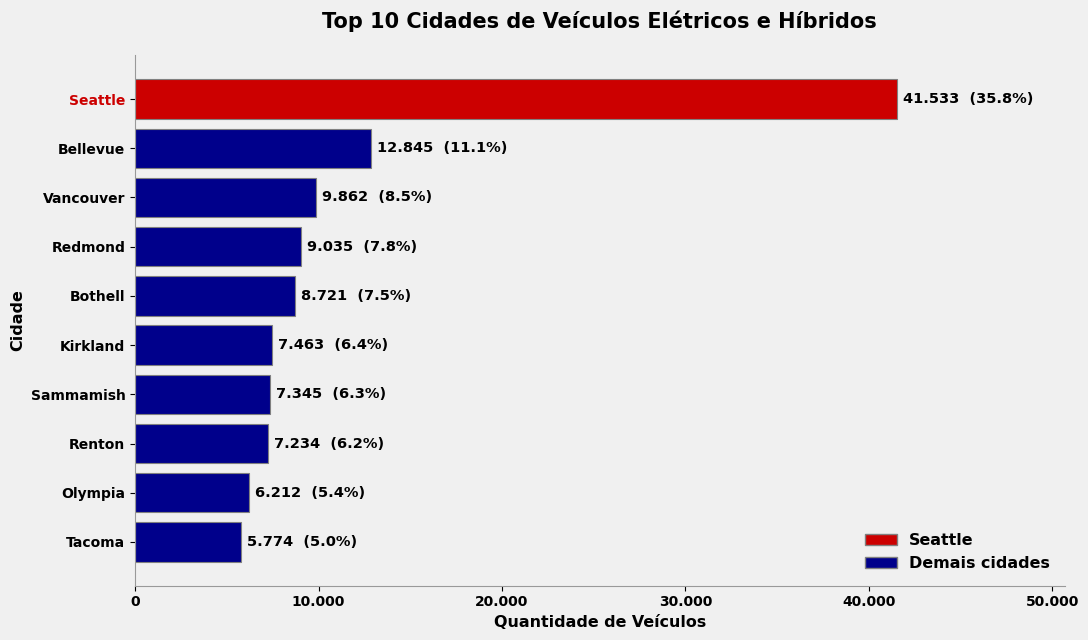

In [10]:
# Célula 10
# Gráfico 2 - Top 10 Cidades de Veículos Elétricos e Híbridos

import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Dados
top_cities = df['Cidade'].value_counts().head(10).sort_values(ascending=True)
total_top10 = top_cities.sum()
percentages = (top_cities / total_top10 * 100).round(1)

# Cores
cores = ['#cc0000' if city == 'Seattle' else 'darkblue' for city in top_cities.index]

plt.figure(figsize=(11, 6.5))
plt.gcf().patch.set_facecolor('#f0f0f0')
plt.gca().set_facecolor('#f0f0f0')

bars = plt.barh(top_cities.index, top_cities.values,
                color=cores, edgecolor='grey', linewidth=0.8)

# Valores + % à direita das barras
for bar, valor, pct in zip(bars, top_cities.values, percentages):
    plt.text(valor + top_cities.max()*0.008,
             bar.get_y() + bar.get_height()/2,
             f'{valor:,.0f}'.replace(',', '.') + f'  ({pct}%)',
             va='center', ha='left', fontsize=10.5)

# Título e rótulos
plt.title('Top 10 Cidades de Veículos Elétricos e Híbridos',
          fontsize=15, pad=20)
plt.xlabel('Quantidade de Veículos', fontsize=11.5)
plt.ylabel('Cidade', fontsize=11.5)

# Formatação milhar com ponto
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'.replace(',', '.')))

# Estética limpa
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_color('#999999')
plt.gca().spines['left'].set_color('#999999')

# Seattle em vermelho no eixo Y
for label in plt.gca().get_yticklabels():
    if label.get_text() == 'Seattle':
        label.set_color('#cc0000')

# Legenda
legend_elements = [
    Patch(facecolor='#cc0000', edgecolor='grey', label='Seattle'),
    Patch(facecolor='darkblue', edgecolor='grey', label='Demais cidades')
]
plt.legend(handles=legend_elements, loc='lower right', frameon=False, fontsize=11.5)

plt.xlim(0, top_cities.max() * 1.22)

# Negrito
for texto in plt.gcf().findobj(matplotlib.text.Text):
    texto.set_fontweight('bold')

plt.tight_layout()
plt.show()

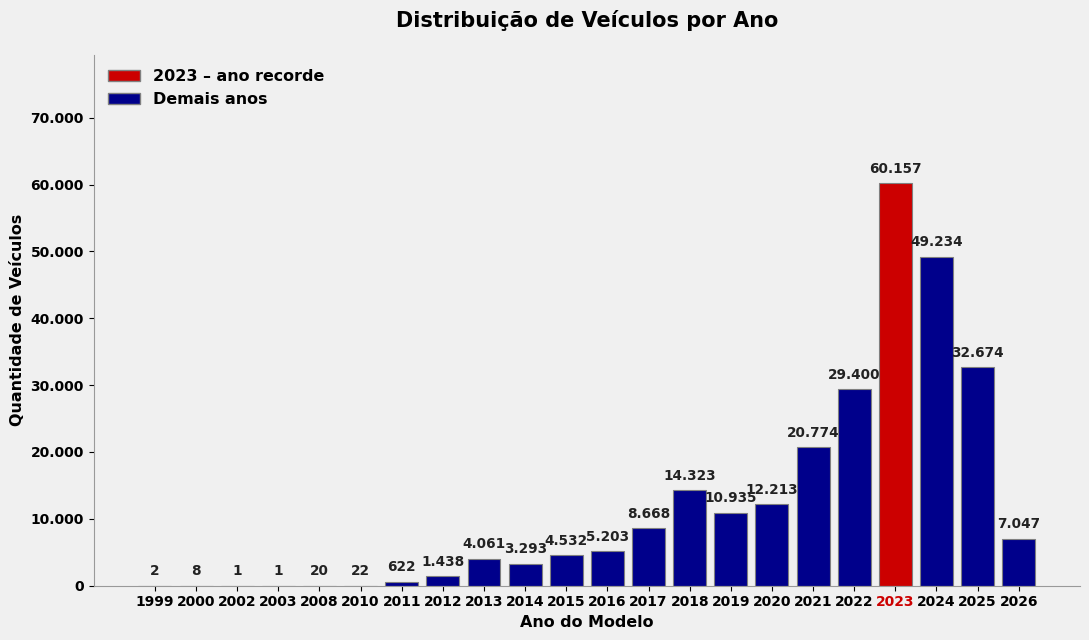

In [11]:
# Célula 11 
# Gráfico 3 — Distribuição de Veículos por Ano

import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Dados
year_counts = df['Ano_Modelo'].value_counts().sort_index()
ano_maior = year_counts.idxmax()

# Cores
cores = ['#cc0000' if ano == ano_maior else 'darkblue' for ano in year_counts.index]

plt.figure(figsize=(11, 6.5))
plt.gcf().patch.set_facecolor('#f0f0f0')
plt.gca().set_facecolor('#f0f0f0')

bars = plt.bar(year_counts.index.astype(str), year_counts.values,
               color=cores, edgecolor='grey', linewidth=0.8)

# Valores
for bar, valor in zip(bars, year_counts.values):
    plt.text(bar.get_x() + bar.get_width()/2,
             valor + year_counts.max() * 0.018,   # era 0.012 → aumentei pra dar espaço
             f'{valor:,.0f}'.replace(',', '.'),
             ha='center', va='bottom',
             fontsize=9.8,                        # era 10.5 → diminuí só um tico
             color='#222222')

# Título e eixos
plt.title('Distribuição de Veículos por Ano',
          fontsize=15, pad=20)
plt.xlabel('Ano do Modelo', fontsize=11.5)
plt.ylabel('Quantidade de Veículos', fontsize=11.5)

# Formatação milhar
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:,.0f}'.replace(',', '.')))

# Estética limpa
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_color('#999999')
plt.gca().spines['left'].set_color('#999999')

# Ano recorde em vermelho no eixo X
for label in plt.gca().get_xticklabels():
    if label.get_text() == str(ano_maior):
        label.set_color('#cc0000')

# Legenda
legend_elements = [
    Patch(facecolor='#cc0000', edgecolor='grey', label=f'{ano_maior} – ano recorde'),
    Patch(facecolor='darkblue', edgecolor='grey', label='Demais anos')
]
plt.legend(handles=legend_elements, loc='upper left', frameon=False, fontsize=11.5)

plt.ylim(0, year_counts.max() * 1.32)   # era 1.20 → dei mais espaço em cima

# Negrito
for texto in plt.gcf().findobj(matplotlib.text.Text):
    texto.set_fontweight('bold')

plt.tight_layout()
plt.show()

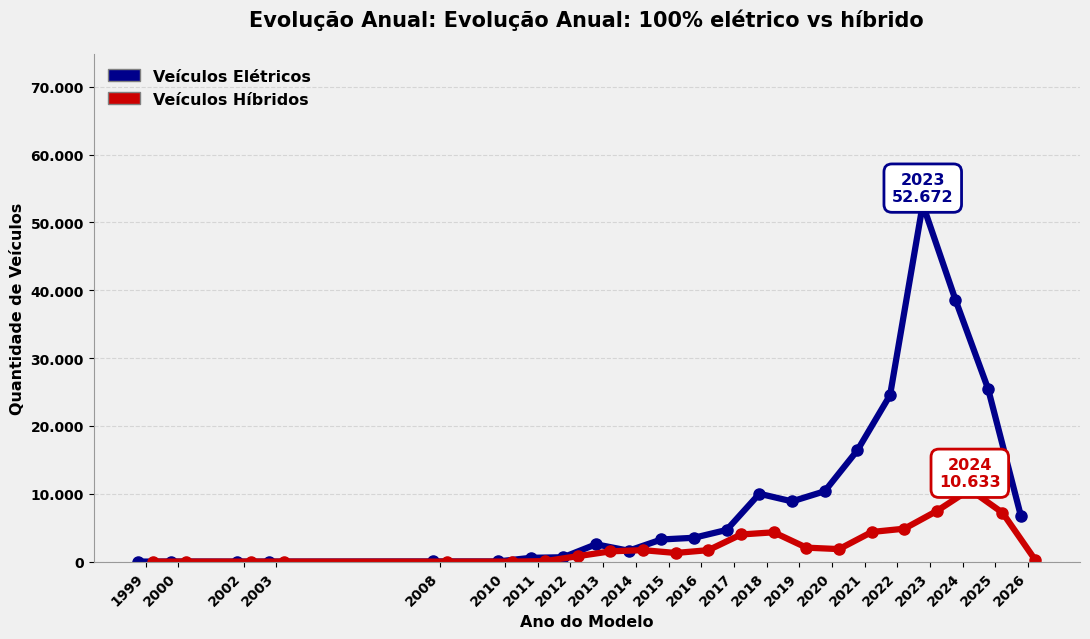

In [50]:
# Célula 12 
# Gráfico 4 — Evolução Anual: 100% elétrico vs híbrido

import matplotlib.pyplot as plt
from matplotlib.patches import Patch

df_grouped = df.groupby(['Ano_Modelo', 'Tipo_Veiculo']).size().unstack(fill_value=0)
for col in ['Battery Electric Vehicle (BEV)', 'Plug-in Hybrid Electric Vehicle (PHEV)']:
    if col not in df_grouped.columns:
        df_grouped[col] = 0
df_grouped = df_grouped.sort_index()

anos = df_grouped.index
bev  = df_grouped['Battery Electric Vehicle (BEV)']
phev = df_grouped['Plug-in Hybrid Electric Vehicle (PHEV)']

plt.figure(figsize=(11, 6.5))
plt.gcf().patch.set_facecolor('#f0f0f0')
plt.gca().set_facecolor('#f0f0f0')

offset = 0.22
plt.plot(anos - offset, bev,  marker='o', markersize=8, linewidth=4.5, color='darkblue',  label='BEV – 100% elétrico')
plt.plot(anos + offset, phev, marker='o', markersize=8, linewidth=4.5, color='#cc0000', label='PHEV – híbrido plug-in')

# 2023 → pico dos elétricos (rótulo acima do ponto)
if 2023 in anos:
    idx = anos.get_loc(2023)
    plt.text(2023 - offset, bev.iloc[idx],
             f'2023\n{bev.iloc[idx]:,.0f}'.replace(',', '.'),
             ha='center', va='bottom', fontsize=11.5,   # agora fica em cima
             bbox=dict(facecolor='white', edgecolor='darkblue', boxstyle='round,pad=0.5', lw=2),
             color='darkblue')

# 2024 → pico dos híbridos (rótulo acima do ponto)
if 2024 in anos:
    idx = anos.get_loc(2024)
    plt.text(2024 + offset, phev.iloc[idx],
             f'2024\n{phev.iloc[idx]:,.0f}'.replace(',', '.'),
             ha='center', va='bottom', fontsize=11.5,   # agora fica em cima
             bbox=dict(facecolor='white', edgecolor='#cc0000', boxstyle='round,pad=0.5', lw=2),
             color='#cc0000')

# Título e eixos
plt.title('Evolução Anual: Evolução Anual: 100% elétrico vs híbrido',
          fontsize=15, pad=20)
plt.xlabel('Ano do Modelo', fontsize=11.5)
plt.ylabel('Quantidade de Veículos', fontsize=11.5)

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:,.0f}'.replace(',', '.')))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_color('#999999')
plt.gca().spines['left'].set_color('#999999')
plt.gca().grid(axis='y', linestyle='--', color='#bbbbbb', alpha=0.5)

legend_elements = [
    Patch(facecolor='darkblue',  edgecolor='grey', label='Veículos Elétricos'),
    Patch(facecolor='#cc0000',   edgecolor='grey', label='Veículos Híbridos')
]
plt.legend(handles=legend_elements, loc='upper left', frameon=False, fontsize=11.5)

plt.xticks(anos, rotation=45, ha='right')
plt.ylim(0, max(bev.max(), phev.max()) * 1.42)

# NEGRITO GARANTIDO
for texto in plt.gcf().findobj(matplotlib.text.Text):
    texto.set_fontweight('bold')

plt.tight_layout()
plt.show()

In [44]:
# Célula 13 - Preparação de Marca + Modelo (obrigatória pro Top 10 Modelos)

# Cria a coluna combinada de forma segura
df['Marca_Modelo'] = (df['Marca'].fillna('') + ' ' + df['Modelo'].fillna('')).str.strip()

print("Coluna 'Marca_Modelo' criada com sucesso!")
print("Exemplo dos primeiros valores:")
print(df['Marca_Modelo'].head(10).tolist())

Coluna 'Marca_Modelo' criada com sucesso!
Exemplo dos primeiros valores:
['AUDI Q5 E', 'AUDI A3', 'NISSAN LEAF', 'AUDI E-TRON', 'TESLA MODEL X', 'KIA SOUL', 'NISSAN LEAF', 'KIA NIRO', 'HYUNDAI TUCSON', 'JEEP WRANGLER']


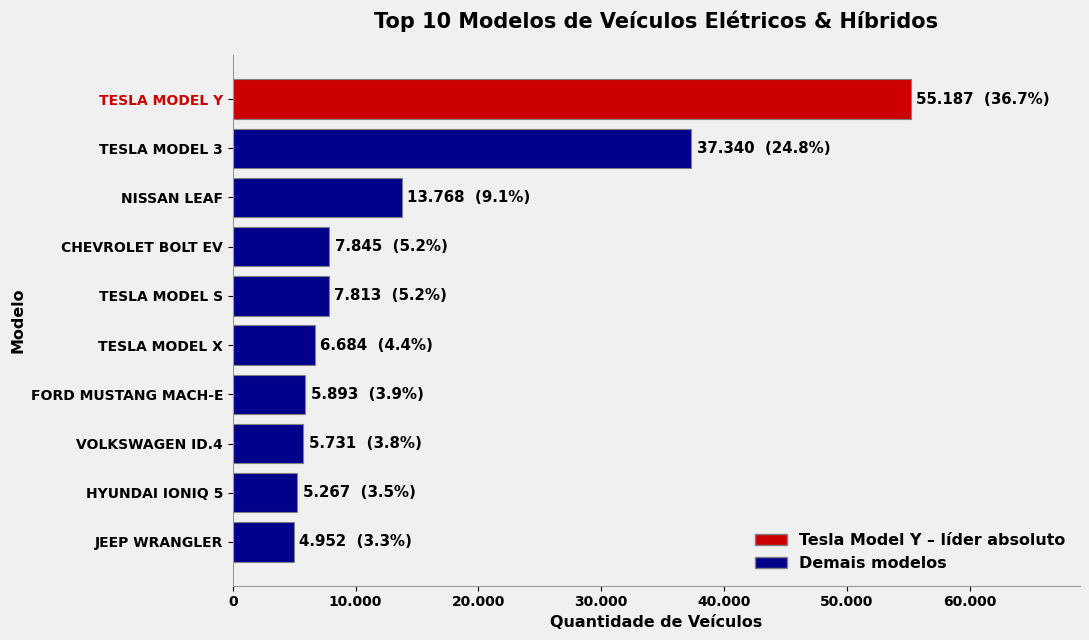

In [52]:
# Célula 14
# Gráfico 5 — Top 10 Modelos de Veículos Elétricos & Híbridos

import matplotlib.pyplot as plt
from matplotlib.patches import Patch

top10 = df['Marca_Modelo'].value_counts().head(10)

plt.figure(figsize=(11, 6.5))
plt.gcf().patch.set_facecolor('#f0f0f0')
plt.gca().set_facecolor('#f0f0f0')

# Apenas o líder (Tesla Model Y) em vermelho
cores = ['#cc0000' if i == len(top10)-1 else 'darkblue' for i in range(len(top10))]

# Gráfico horizontal – maior em cima
bars = plt.barh(top10.index[::-1], top10.values[::-1],
                color=cores, edgecolor='grey', linewidth=0.8)

# Valores à direita das barras (com % do Top 10)
total = top10.sum()
for i, (modelo, qtd) in enumerate(top10[::-1].items()):
    pct = qtd / total * 100
    plt.text(qtd + top10.max()*0.008,
             i,
             f'{qtd:,.0f}'.replace(',', '.') + f'  ({pct:.1f}%)',
             va='center', ha='left', fontsize=10.8)

# Título e eixos (mesmo padrão dos outros gráficos)
plt.title('Top 10 Modelos de Veículos Elétricos & Híbridos',
          fontsize=15, pad=20)
plt.xlabel('Quantidade de Veículos', fontsize=11.5)
plt.ylabel('Modelo', fontsize=11.5)

# Formatação milhar com ponto
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'.replace(',', '.')))

# Estética limpa
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_color('#999999')
plt.gca().spines['left'].set_color('#999999')

# Tesla Model Y em vermelho no eixo Y
for label in plt.gca().get_yticklabels():
    if 'TESLA MODEL Y' in label.get_text():
        label.set_color('#cc0000')

# Legenda
legend_elements = [
    Patch(facecolor='#cc0000', edgecolor='grey', label='Tesla Model Y – líder absoluto'),
    Patch(facecolor='darkblue', edgecolor='grey', label='Demais modelos')
]
plt.legend(handles=legend_elements, loc='lower right', frameon=False, fontsize=11.5)

plt.xlim(0, top10.max() * 1.25)

# Legendas em negrito
for texto in plt.gcf().findobj(matplotlib.text.Text):
    texto.set_fontweight('bold')

plt.tight_layout()
plt.show()

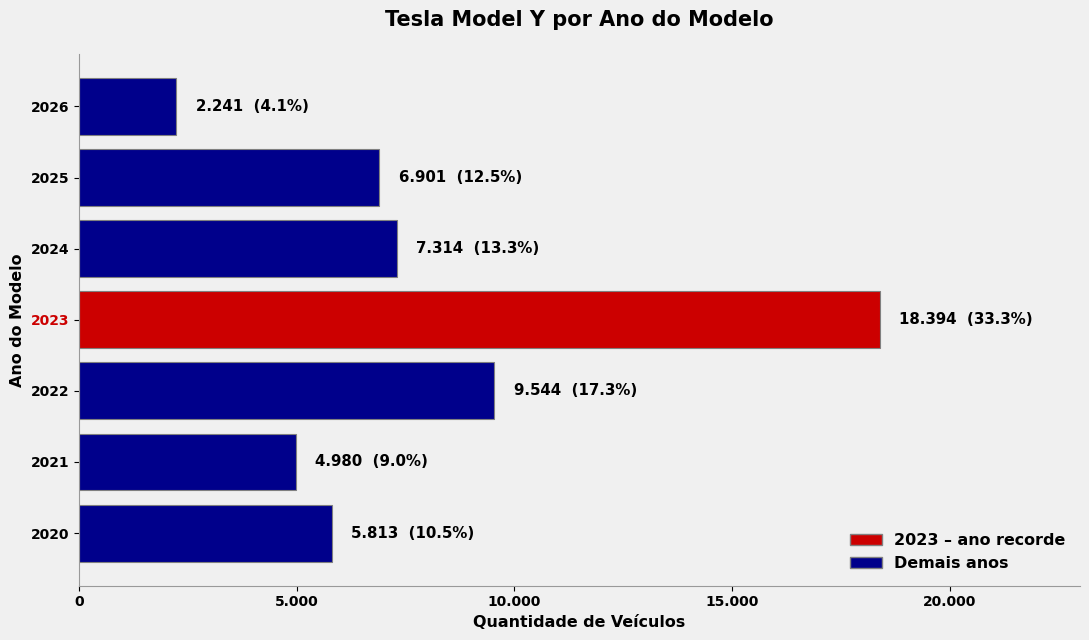

In [53]:
# Célula 15
# Gráfico 6 - Tesla Model Y por Ano do Modelo

import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Filtra apenas Tesla Model Y
model_y = df[(df['Marca'] == 'TESLA') & (df['Modelo'] == 'MODEL Y')]

# Contagem por ano do modelo
model_y_por_ano = model_y['Ano_Modelo'].value_counts().sort_index()

# Ano recorde (ex: 2023 ou 2024)
ano_maior = model_y_por_ano.idxmax()

plt.figure(figsize=(11, 6.5))
plt.gcf().patch.set_facecolor('#f0f0f0')
plt.gca().set_facecolor('#f0f0f0')

# Cores: ano recorde em vermelho, demais em darkblue
cores = ['#cc0000' if ano == ano_maior else 'darkblue' for ano in model_y_por_ano.index]

# Gráfico horizontal – maior em cima
bars = plt.barh(range(len(model_y_por_ano)-1, -1, -1),
                model_y_por_ano.values,
                color=cores, edgecolor='grey', linewidth=0.8)

# Valores + percentual do total de Model Y
total_my = model_y_por_ano.sum()
for i, qtd in enumerate(model_y_por_ano.values):
    pct = qtd / total_my * 100
    plt.text(qtd + total_my*0.008,
             len(model_y_por_ano)-1-i,
             f'{qtd:,.0f}'.replace(',', '.') + f'  ({pct:.1f}%)',
             va='center', ha='left', fontsize=10.8)

# Título e eixos (mesmo padrão dos outros gráficos)
plt.title('Tesla Model Y por Ano do Modelo',
          fontsize=15, pad=20)
plt.xlabel('Quantidade de Veículos', fontsize=11.5)
plt.ylabel('Ano do Modelo', fontsize=11.5)

# Eixo Y com anos inteiros
plt.gca().set_yticks(range(len(model_y_por_ano)))
plt.gca().set_yticklabels(model_y_por_ano.index.astype(int))

# Ano recorde em vermelho no eixo Y
for label in plt.gca().get_yticklabels():
    if int(label.get_text()) == ano_maior:
        label.set_color('#cc0000')

# Formatação e estética
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'.replace(',', '.')))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_color('#999999')
plt.gca().spines['left'].set_color('#999999')

# Legenda
legend_elements = [
    Patch(facecolor='#cc0000', edgecolor='grey', label=f'{ano_maior} – ano recorde'),
    Patch(facecolor='darkblue', edgecolor='grey', label='Demais anos')
]
plt.legend(handles=legend_elements, loc='lower right', frameon=False, fontsize=11.5)

plt.xlim(0, model_y_por_ano.max() * 1.25)

# GARANTE NEGRITO EM TUDO (título, eixos, ticks, valores, legenda)
for texto in plt.gcf().findobj(matplotlib.text.Text):
    texto.set_fontweight('bold')

plt.tight_layout()
plt.show()